In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import gymnasium
from gym import spaces

In [ ]:
! pip install gymnasium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 13.2 MB/s eta 0:00:00


In [ ]:
import gym

class DiagonalTaxiWrapper(gym.Wrapper):
    """
    A wrapper class for the Taxi-v3 environment that allows diagonal movement.
    """

    def __init__(self, env):
        super().__init__(env)

        # Modify the action space here
        self.action_space = spaces.Discrete(10)  # Restrict to three actions


    def step(self, action):
        # Convert the action to a tuple of (delta_x, delta_y).
        if action == 0 or action == 1 or action ==2 or action == 3 or action == 4 or action == 5:
            act = self.env.step(action)
            return act
        elif action == 6:
            action0 = 0
            action1 = 2

            act = self.env.step(action0)
            act = self.env.step(action1)
            return act


        elif action == 7:
             # Move diagonally top-right.
            action0 = 1
            action1 = 2

            act = self.env.step(action0)
            act = self.env.step(action1)
            return act

            action = 1
        elif action == 8 :
            dx , dy = (-1 , 0 ) # Move diagonally bottom-left
            action0 = 0
            action1 = 3

            act = self.env.step(action0)
            act = self.env.step(action1)
            return act


        elif action == 9 :        # Move diagonally top-left
            action0 = 1
            action1 = 2

            act = self.env.step(action0)
            act = self.env.step(action1)
            return act

        else:
            raise ValueError(f"Invalid action: {action}")

#         # Compute the new position after taking the action.
#         print(self.env.s)
#         old_pos = list(self.env.decode(self.env.s) )
#         print(old_pos)
#         new_pos = [old_pos[0] + dx, old_pos[1] + dy]
#         target_pos = [old_pos[0] + tdx, old_pos[1] + tdy]


#         # Check if the new position is valid or not.
#         if target_pos[0] < 0 or target_pos[0] >= self.env.desc.shape[0] or target_pos[1] < 0 or target_pos[1] >= self.env.desc.shape[1]:
#             reward = -1.0  # Invalid move penalty.
#             done = False
#             info = {}
#             act = []
#             act.append(self.env.s)
#             act.append(reward)
#             act.append(done)
#             act.append(info)
#             return act
#         print(action)
#         # Compute the new state after taking the action.
#         new_state = self.env.encode(*new_pos, old_pos[2], old_pos[3])
#         self.env.s = new_state
#         # Execute the action in the underlying environment.
#         act =  self.env.step(action)

#         return act

    def action(self, action):
        # Perform any additional processing on the action here
        return action


In this notebook we want to solve "Taxi Cab" problem via Q-Learning algorithm .
In this problem the agent has 10 actions . 8 actions for move to the states in the behind and 2 actios for pick up and drop off the passengers . we have ti implement it via wrappers .

The environmnet of Taxi is like below : \
![title](Pictures/p1.png)

The problem will be solved by off Policy algorithm named Q-Learning .\
it has two Policys . one of them is behavioral and another one is for control .
![title](Pictures/p2.png)

Streaming output truncated to the last 5000 lines.
Episode 5000
Episode 5001
Episode 5002
Episode 5003
Episode 5004
Episode 5005
Episode 5006
Episode 5007
Episode 5008
Episode 5009
Episode 5010
Episode 5011
Episode 5012
Episode 5013
Episode 5014
Episode 5015
Episode 5016
Episode 5017
Episode 5018
Episode 5019
Episode 5020
Episode 5021
Episode 5022
Episode 5023
Episode 5024
Episode 5025
Episode 5026
Episode 5027
Episode 5028
Episode 5029
Episode 5030
Episode 5031
Episode 5032
Episode 5033
Episode 5034
Episode 5035
Episode 5036
Episode 5037
Episode 5038
Episode 5039
Episode 5040
Episode 5041
Episode 5042
Episode 5043
Episode 5044
Episode 5045
Episode 5046
Episode 5047
Episode 5048
Episode 5049
Episode 5050
Episode 5051
Episode 5052
Episode 5053
Episode 5054
Episode 5055
Episode 5056
Episode 5057
Episode 5058
Episode 5059
Episode 5060
Episode 5061
Episode 5062
Episode 5063
Episode 5064
Episode 5065
Episode 5066
Episode 5067
Episode 5068
Episode 5069
Episode 5070
Episode 5071
Episode 5072


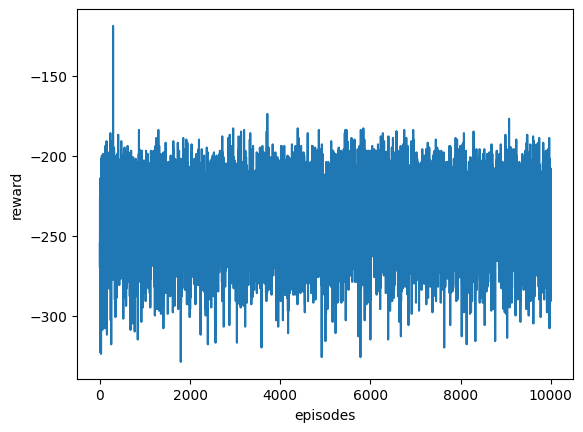

In [ ]:
env = gym.make('Taxi-v3')
env = DiagonalTaxiWrapper(env)

# we create a table with  observation_space x  action_space
q_table = np.zeros([env.observation_space.n , env.action_space.n])
# we train our model for 1000 episodes
training_episodes = 10000
# here we define aggregating_rewards variable and then we illustrare it
index = [i for i in range(10000)]
aggregating_rewards=[]
#  in this case we use epsilon greedy and we assign 0.15 as exploratin and 0.85 for choosing the maximum q
epsilon = 0.15
discount_factor = 0

for i in range(training_episodes) :

    state = env.reset()
    done = False
    agregate_reward = 0

    while not done :

        if random.uniform(0 ,1 ) < epsilon :

            action = env.action_space.sample()

        else :

            action = np.argmax(q_table[state])

        act = env.step(action)
#         act[0] ->next_state
#         act[1] ->reward
#         act[2] ->done
        last_q= q_table[state , action ]
        current_reward = np.max(q_table[act[0]])
        agregate_reward +=  act[1]
        q_table[state , action] = last_q + discount_factor*(act[1] + current_reward - last_q)
        state =act[0]
        done = act[2]

    aggregating_rewards.append(agregate_reward)
    print(f"Episode {i}")



plt.plot(index, aggregating_rewards)
plt.xlabel("episodes")
plt.ylabel("reward")
plt.show()




In [ ]:
for i in range(500) :
    for j in range(5) :
        print(q_table[i , j])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
env = gymnasium.make('Taxi' , render_mode='human')
state=env.reset()[0]
while True :

    action = random.randint(0,5)
    print(action)
    act1 = env.step(action)

    if act1[3] :
        break
    state = act1[0]
time.sleep(5)
env.close()




/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:531: UserWarning: WARN: Using the latest versioned environment `Taxi-v3` instead of the unversioned environment `Taxi`.
  logger.warn(


error: ignored